In [2]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as ds
import sklearn.cross_validation as cv
import sklearn.grid_search as gs
import sklearn.svm as svm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

In [3]:
X = np.random.randn(200, 2)
y = X[:, 0] + X[:, 1] > 1

In [5]:
# train the SVC(Support Vector Classifier)
est = svm.LinearSVC()
est.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [10]:
# define a function that displays the boundaries and decision function of a trained classifier

# generate a grid in the square [-3, 3]^2
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))

# this function takes a SVM estimator as input
def plot_decision_function(est):
    # グリッド上で決定関数を評価する
    Z = est.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap = plt.cm.Blues
    
    # 画面にグリッド状の決定関数を表示する
    plt.figure(figsize=(8,6))
    plt.imshow(Z, 
               extent=(xx.min(),xx.max(), yy.min(), yy.max()),
               aspect='auto', origin='lower', cmap=cmap)
    # 境界を描画する
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')
    
    # ラベルの値に従って点を描画する
    plt.scatter(X[:,0], X[:,1], s=30, c=.5+.5*y, lw=1, cmap=cmap, vmin=0, vmax=1)
    plt.axhline(0, color='k', ls='--')
    plt.axvline(0, color='k', ls='--')
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 3])

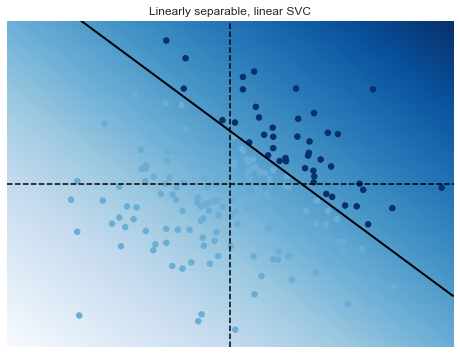

In [14]:
plot_decision_function(est)
plt.title("Linearly separable, linear SVC")

In [20]:
y = np.logical_xor(X[:, 0]>0, X[:, 1]>0)

# 分類機の学習
est = gs.GridSearchCV(svm.LinearSVC(), {'C': np.logspace(-3., 3., 10)})
est.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   4.64159e-03,   2.15443e-02,   1.00000e-01,
         4.64159e-01,   2.15443e+00,   1.00000e+01,   4.64159e+01,
         2.15443e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

Score: 0.6


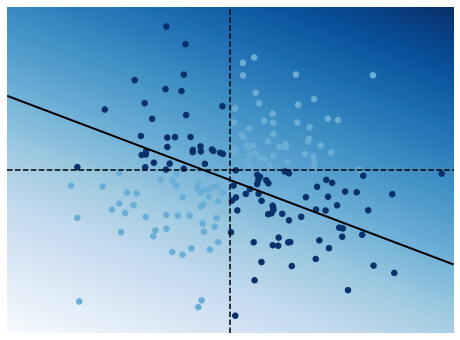

In [21]:
print("Score: {0:.1f}".format(cv.cross_val_score(est, X, y).mean()))
plot_decision_function(est)

Score is: 0.950


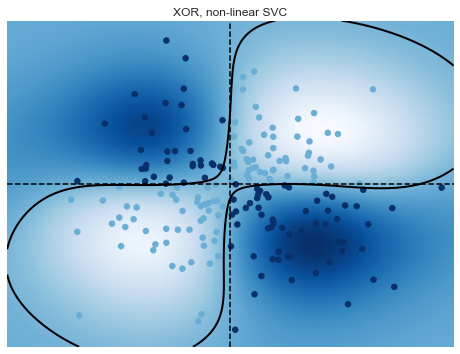

In [24]:
y = np.logical_xor(X[:, 0]>0, X[:,1]>0)
est = gs.GridSearchCV(svm.SVC(), {'C': np.logspace(-3., 3., 10), 'gamma': np.logspace(-3., 3., 10)})
est.fit(X, y)
print("Score is: {0:.3f}".format(cv.cross_val_score(est, X, y).mean()))

plot_decision_function(est.best_estimator_)
plt.title("XOR, non-linear SVC")

In [9]:
# numpy.ravel()は多次元配列をいちじ
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(a)
print(a.ravel())

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3 4 5 6 7 8 9]
